C:\Users\ericsc\AppData\Local\Temp\ipykernel_19404\3780672028.py:15: RuntimeWarning: invalid value encountered in sqrt
  return C**alpha * L**beta
C:\Users\ericsc\AppData\Local\Temp\ipykernel_19404\3780672028.py:15: RuntimeWarning: invalid value encountered in scalar power
  return C**alpha * L**beta
C:\Users\ericsc\AppData\Local\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:2375: OptimizeWarning: 
NaN result encountered.
  _endprint(x, flag, fval, maxfun, xatol, disp)


Optimal Leisure without tax: 13.249986828863467
Optimal Consumption without tax: 265.00026342273065
Optimal Leisure with tax: 13.562499623561683
Optimal Consumption with tax: 217.00000602301307
Compensating Variation (CV): -1180.3398874989489
Equivalent Variation (EV): -4999.999892373624


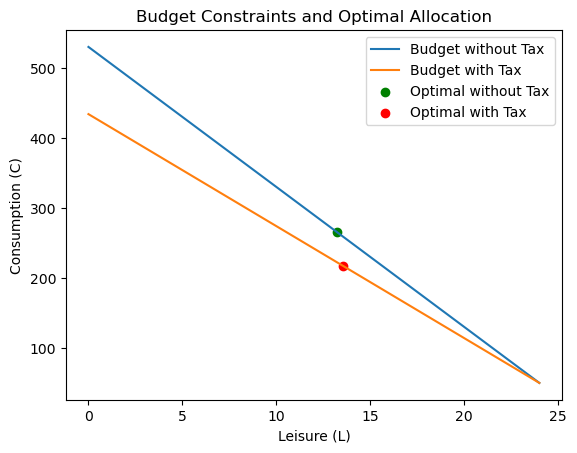

In [2]:
import numpy as np
from scipy.optimize import minimize, fminbound
import matplotlib.pyplot as plt

# Utility function parameters
alpha = 0.5
beta = 0.5
T = 24  # Total hours in a day
w = 20  # Wage rate
y = 50  # Non-labor income
t = 0.2  # Marginal tax rate

def utility(C, L):
    """Cobb-Douglas utility function."""
    return C**alpha * L**beta

def budget_without_tax(L):
    """Budget constraint without tax."""
    C = w * (T - L) + y
    return -utility(C, L)  # We minimize the negative utility

def budget_with_tax(L):
    """Budget constraint with tax."""
    C = (1 - t) * w * (T - L) + y
    return -utility(C, L)  # We minimize the negative utility

# Solve for optimal leisure without tax
result_no_tax = minimize(budget_without_tax, x0=[T/2], bounds=[(0, T)], method='L-BFGS-B')
L_no_tax = result_no_tax.x[0]
C_no_tax = w * (T - L_no_tax) + y
U_no_tax = utility(C_no_tax, L_no_tax)

# Solve for optimal leisure with tax
result_with_tax = minimize(budget_with_tax, x0=[T/2], bounds=[(0, T)], method='L-BFGS-B')
L_with_tax = result_with_tax.x[0]
C_with_tax = (1 - t) * w * (T - L_with_tax) + y
U_with_tax = utility(C_with_tax, L_with_tax)

# Compensating Variation (CV)
def budget_with_compensation(L, compensation):
    """With tax and compensation to maintain pre-tax utility."""
    C = (1 - t) * w * (T - L) + y + compensation
    return -utility(C, L)

# Finding compensating variation
def find_cv(compensation):
    result_with_cv = minimize(budget_with_compensation, x0=[T/2], args=(compensation), bounds=[(0, T)], method='L-BFGS-B')
    return -budget_with_compensation(result_with_cv.x[0], compensation) - U_no_tax

cv = fminbound(find_cv, -5000, 5000)

# Equivalent Variation (EV)
def find_ev(equivalent):
    result_with_ev = minimize(budget_without_tax, x0=[T/2], bounds=[(0, T)], method='L-BFGS-B', options={'disp': False})
    return -budget_without_tax(result_with_ev.x[0]) - U_with_tax + equivalent

ev = fminbound(find_ev, -5000, 5000)

# Print results
print(f"Optimal Leisure without tax: {L_no_tax}")
print(f"Optimal Consumption without tax: {C_no_tax}")
print(f"Optimal Leisure with tax: {L_with_tax}")
print(f"Optimal Consumption with tax: {C_with_tax}")
print(f"Compensating Variation (CV): {cv}")
print(f"Equivalent Variation (EV): {ev}")

# Graphing the results
fig, ax = plt.subplots()
Ls = np.linspace(0, T, 100)
Cs_no_tax = w * (T - Ls) + y
Cs_with_tax = (1 - t) * w * (T - Ls) + y

ax.plot(Ls, Cs_no_tax, label='Budget without Tax')
ax.plot(Ls, Cs_with_tax, label='Budget with Tax')
ax.scatter([L_no_tax], [C_no_tax], color='green', label='Optimal without Tax')
ax.scatter([L_with_tax], [C_with_tax], color='red', label='Optimal with Tax')
ax.set_xlabel('Leisure (L)')
ax.set_ylabel('Consumption (C)')
ax.legend()
plt.title('Budget Constraints and Optimal Allocation')
plt.show()